In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mice = ['ym212', 'ym213', 'ym214', 'ym215', 'ym218', 'ym219', 'ym220', 'ym222', 'ym223', 'ym224', 'ym226', 'ym227']

model_performance = [
    [0.873, 0.8, 0.896, 0.77, 0.818, 0.841, 0.837, 0.814, 0.588, 0.688, 0.636, 0.791],
    [0.87, 0.798, 0.908, 0.796, 0.831, 0.824, 0.854, 0.824, 0.612, 0.67, 0.533, 0.758],
    [0.88, 0.811, 0.904, 0.787, 0.825, 0.83, 0.869, 0.813, 0.61, 0.683, 0.572, 0.783],
    [0.705, 0.884, 0.724, 0.422, 0.553, 0.624, 0.458, 0.19, 0.513, 0.457, 0.637, 0.507],
    [0.753, 0.891, 0.7, 0.535, 0.639, 0.615, 0.606, 0.497, 0.562, 0.508, 0.638, 0.676], 
    [0.787, 0.85, 0.743, 0.544, 0.609, 0.685, 0.664, 0.516, 0.505, 0.485, 0.662, 0.682]]

In [3]:
results = pd.DataFrame(columns = ['Mouse', 
                                  'Transformer-NonFreeze',
                                  'Transformer-NonFreeze LARGE',
                                  'Transformer-NonFreeze xLARGE',
                                  'Transformer-Freeze', 
                                  'Transformer-Freeze LARGE', 
                                  'Transformer-Freeze xLARGE'])
results['Mouse'] = mice
for i in range(len(model_performance)):
    results.iloc[:, i+1] = model_performance[i]

In [4]:
df_non_freeze = results.iloc[:, [0, 1, 2, 3]]
df_freeze = results.iloc[:, [0, 4, 5, 6]]

In [5]:
# # Setting up color schemes and line styles
# colors_non_freeze = {
#     'Transformer-NonFreeze': 'lightsalmon',
#     'Transformer-NonFreeze LARGE': 'darkorange',
#     'Transformer-NonFreeze xLARGE': 'chocolate'
# }

# colors_freeze = {
#     'Transformer-Freeze': 'thistle',
#     'Transformer-Freeze LARGE': 'plum',
#     'Transformer-Freeze xLARGE': 'darkviolet'
# }

In [6]:
colors_non_freeze = {
    'Transformer-NonFreeze': 'chocolate',
    'Transformer-NonFreeze LARGE': 'chocolate',
    'Transformer-NonFreeze xLARGE': 'chocolate'
}

colors_freeze = {
    'Transformer-Freeze': 'darkviolet',
    'Transformer-Freeze LARGE': 'darkviolet',
    'Transformer-Freeze xLARGE': 'darkviolet'
}

In [7]:
df_non_freeze

,Mouse,Transformer-NonFreeze,Transformer-NonFreeze LARGE,Transformer-NonFreeze xLARGE
0,ym212,0.873,0.870,0.880
1,ym213,0.800,0.798,0.811
2,ym214,0.896,0.908,0.904
3,ym215,0.770,0.796,0.787
4,ym218,0.818,0.831,0.825
5,ym219,0.841,0.824,0.830
6,ym220,0.837,0.854,0.869
7,ym222,0.814,0.824,0.813
8,ym223,0.588,0.612,0.610
9,ym224,0.688,0.670,0.683


e:\Tools\anaconda3\envs\LFP_TRANS_LOCAL\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  if __name__ == "__main__":
e:\Tools\anaconda3\envs\LFP_TRANS_LOCAL\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  # Remove the CWD from sys.path while we load stuff.
e:\Tools\anaconda3\envs\LFP_TRANS_LOCAL\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
e:\Tools\anaconda3\envs\

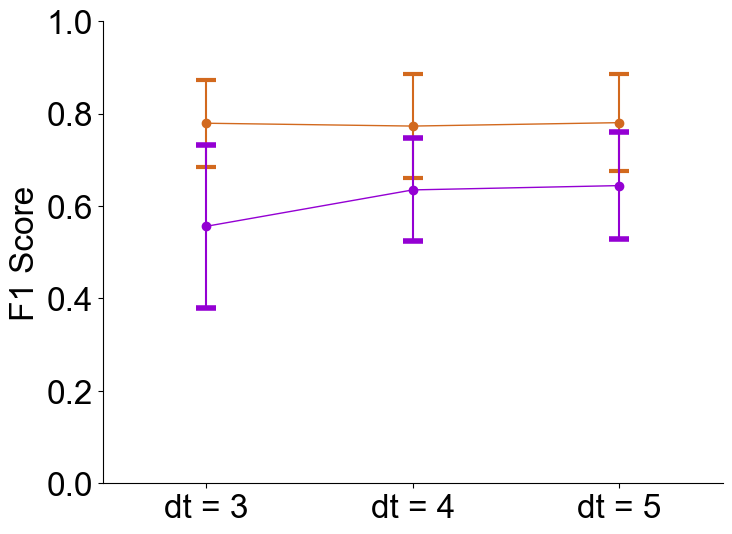

In [8]:
# Creating the plot with horizontal lines at the ends of error bars
fig, ax = plt.subplots(figsize=(8, 6))

# Setting up positions for each bar/error bar
positions = range(1, len(colors_non_freeze) + 1)

# ------ Non-Freeze Models ------
# Calculating mean and standard deviation for each column
non_freeze_means = df_non_freeze.mean()
non_freeze_stds = df_non_freeze.std()

# Plotting error bars with horizontal line caps
for i, (column, color) in enumerate(colors_non_freeze.items(), start=0):
    ax.errorbar(positions[i], non_freeze_means[column], yerr=non_freeze_stds[column], fmt='o', color=color, capsize=7, capthick=3)

# connect the mean dots with a straght line with the last color of the colors_non_freeze
for i in range(len(positions)-1):
    plt.plot([positions[i], positions[i+1]], [non_freeze_means[i], non_freeze_means[i+1]], color='chocolate', linestyle='-', linewidth=1)

# ------ Freeze Models ------
# Calculating mean and standard deviation for each column
freeze_means = df_freeze.mean()
freeze_stds = df_freeze.std()

# Plotting error bars with horizontal line caps
for i, (column, color) in enumerate(colors_freeze.items(), start=0):
    ax.errorbar(positions[i], freeze_means[column], yerr=freeze_stds[column], fmt='o', color=color, capsize=7, capthick=4)

# connect the mean dots with a straght line with the last color of the colors_freeze
for i in range(len(positions)-1):
    plt.plot([positions[i], positions[i+1]], [freeze_means[i], freeze_means[i+1]], color='darkviolet', linestyle='-', linewidth=1)

# -------------------- Customizing the plot
plt.xlim(0.5, 3.5)
plt.ylim(0, 1)
ax.set_xticks(positions)
ax.set_xticklabels(['dt = 3', 'dt = 4', 'dt = 5'])
# ax.set_title('')
ax.set_ylabel('F1 Score', font='Arial', fontsize=24)

plt.xticks(font='Arial', fontsize=24)
plt.yticks(font='Arial', fontsize=24)
# remove the frame of the figure
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()